In [ ]:
!pip install ultralytics > /dev/null

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Clone do github
!git clone https://github.com/Paulo-Hayashida/PGC.git

Mounted at /content/drive


In [ ]:
path = '/content/PGC/yolov8_cfg.yaml'

In [ ]:
# Cópia do dataset utilizado no treinamento
!CP /content/PGC/Roboflow/datasets/Geometry.v1-shapes.yolov8/ /content/PGC/

In [ ]:
# Renomeando pasta para nome do arquivo de configuração
!mv /content/PGC/Geometry.v1-shapes.yolov8/ /content/PGC/dataset

In [ ]:
!yolo task=detect mode=val model=yolov8.pt data={path} epochs=100 imgsz=640 save=True

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 236 layers, 23,203,990 parameters, 0 gradients, 67.4 GFLOPs
val: Scanning /content/datasets/valid/labels... 24 images, 0 backgrounds, 0 corrupt: 100% 24/24 [00:00<00:00, 6609.11it/s]
val: New cache created: /content/datasets/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.02it/s]
                   all         24         53      0.997          1      0.995      0.761
                Circle         20         30      0.996          1      0.995      0.817
              Triangle         15         23      0.998          1      0.995      0.704
Speed: 0.2ms preprocess, 26.6ms inference, 0.0ms loss, 39.6ms postprocess per image
Results saved to runs/detect/yolov8_mmodel_eval4
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!mkdir datasets
!mkdir roboflow
!mv /content/Geometry.v1-shapes.yolov8/test /content/roboflow/test
!mv /content/Geometry.v1-shapes.yolov8/train /content/roboflow/train
!mv /content/Geometry.v1-shapes.yolov8/valid /content/roboflow/valid

!mv /content/roboflow/ /content/datasets/roboflow/

In [ ]:
# Codigo para configurar UTF-8
import locale
locale.getpreferredencoding = lambda: "UTF-8"

Validação

In [ ]:
!yolo task=detect mode=predict model='/content/runs/detect/train/weights/best.pt' conf=0.50 source='/content/PGC/dataset/valid/images' save=True
# !yolo task=detect mode=predict model='/content/runs_roboflow_YOLO8/detect/yolov8_mmodel/weights/best.pt' conf=0.50 source='/content/dataset/valid/images' save=True

Ultralytics YOLOv8.2.95 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs

image 1/24 /content/dataset/valid/images/00002_jpg.rf.ebb935252d4797afd9b38ffb97b8b93e.jpg: 640x640 1 Circle, 37.0ms
image 2/24 /content/dataset/valid/images/00003_jpg.rf.d832c2c236adf9171fef11ad0940c0ca.jpg: 640x640 1 Circle, 37.0ms
image 3/24 /content/dataset/valid/images/00005_jpg.rf.20bfb997973572af6608b18a06d4661a.jpg: 640x640 1 Circle, 37.0ms
image 4/24 /content/dataset/valid/images/00007_jpg.rf.a192198383d83e0724002a8c116fdbbb.jpg: 640x640 1 Circle, 36.9ms
image 5/24 /content/dataset/valid/images/00010_jpg.rf.c2b9bcbcbfd334b05f34ebd1529e00f2.jpg: 640x640 1 Circle, 36.9ms
image 6/24 /content/dataset/valid/images/00012_jpg.rf.0954e4d72f025cc658364a13aa90848e.jpg: 640x640 1 Circle, 36.9ms
image 7/24 /content/dataset/valid/images/00017_jpg.rf.cabec97d0a07beba202768255151aa9b.jpg: 640x640 2 Circles, 36.9ms
image 8

In [ ]:
def draw(img):
  fig = plt.gcf()
  fig.set_size_inches(16,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

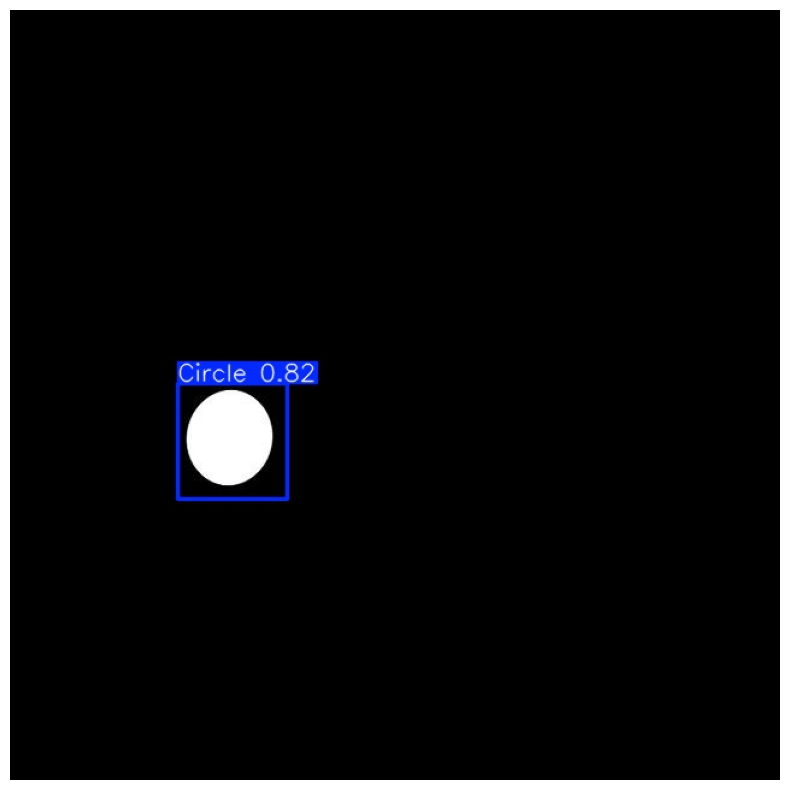

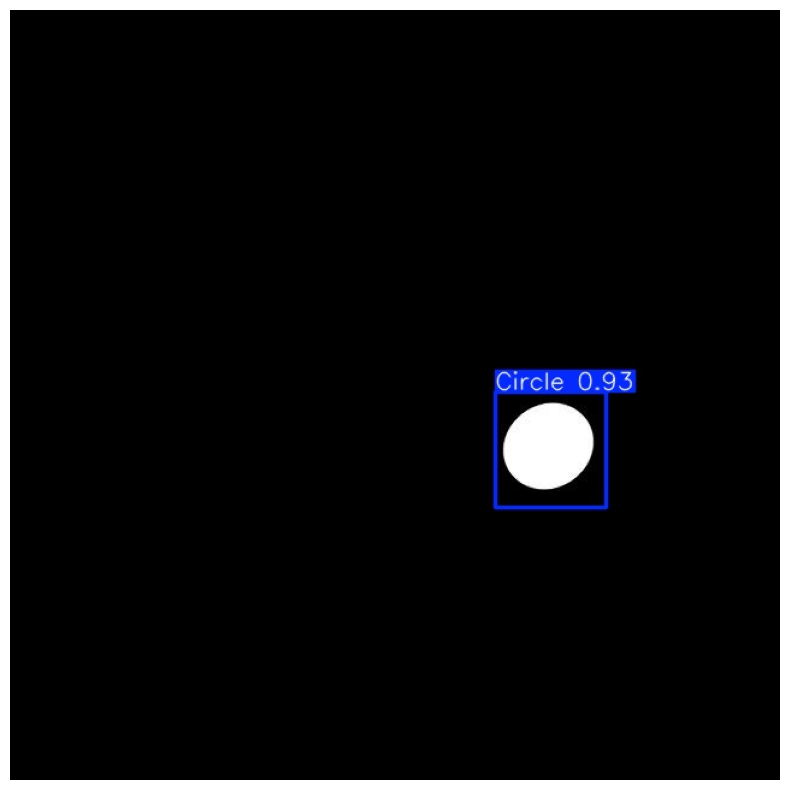

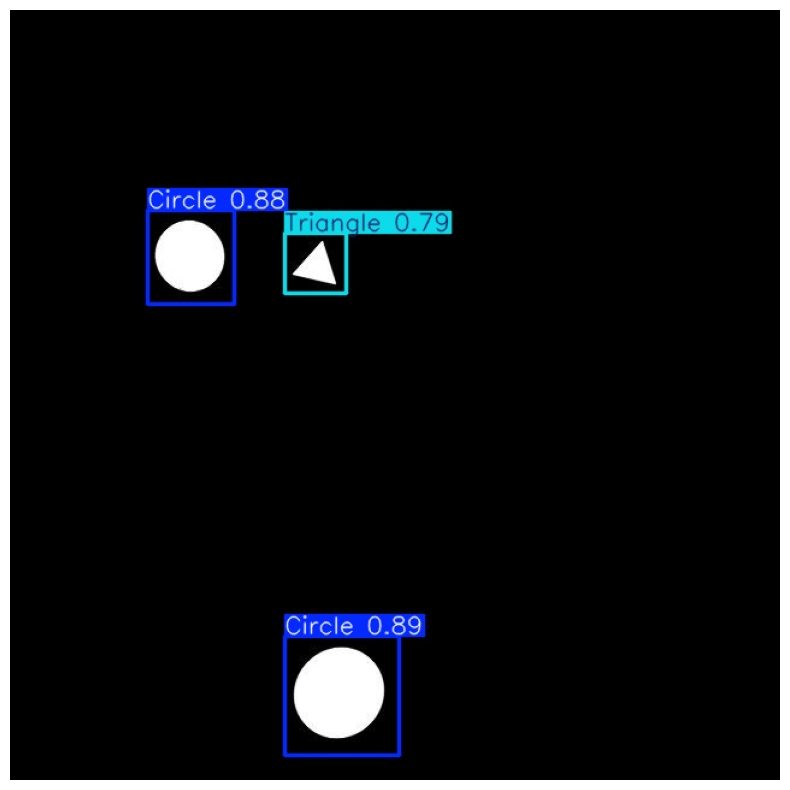

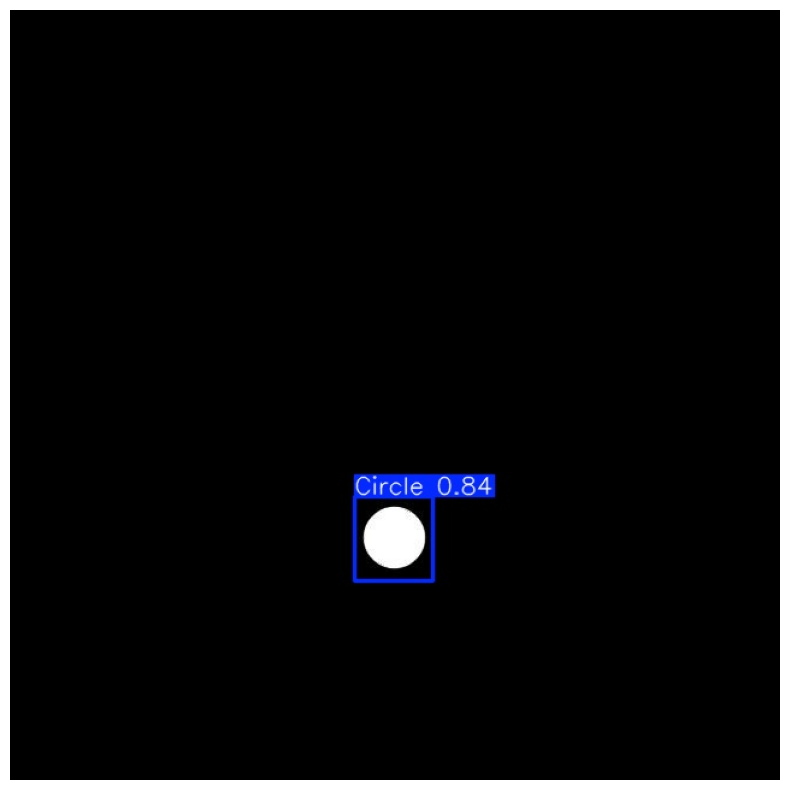

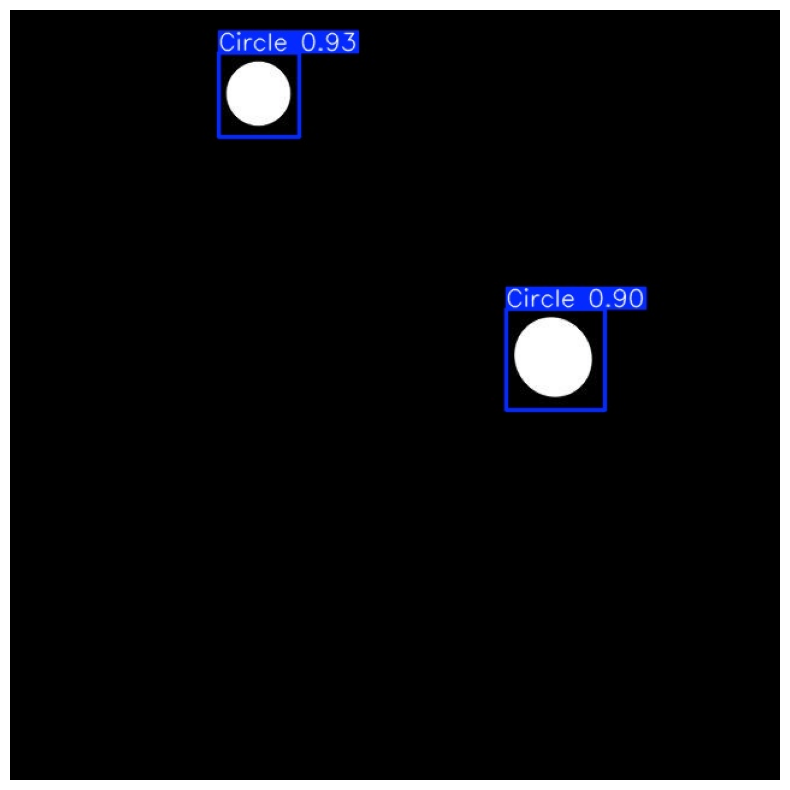

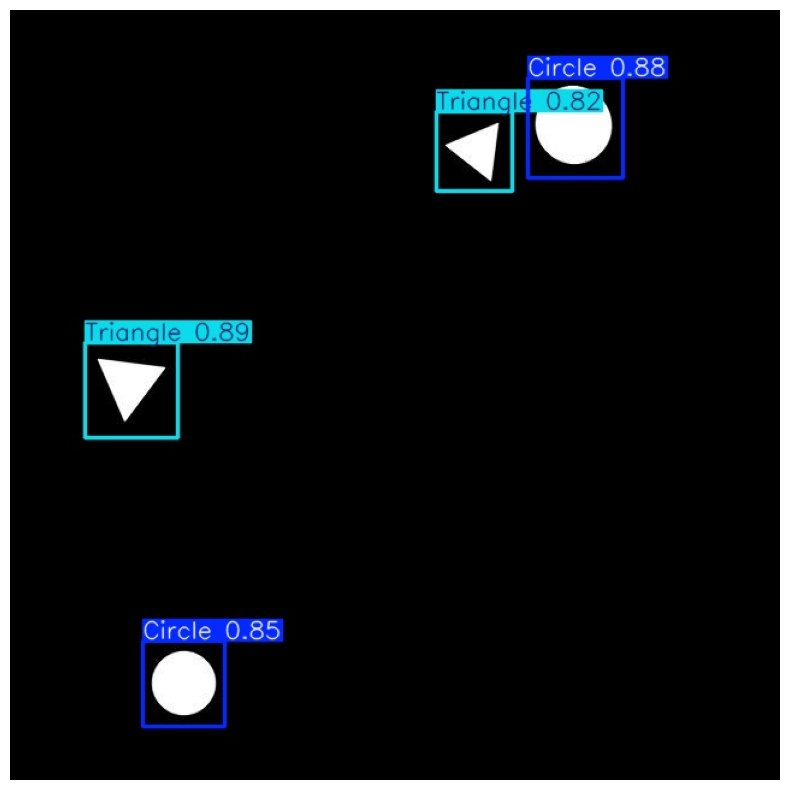

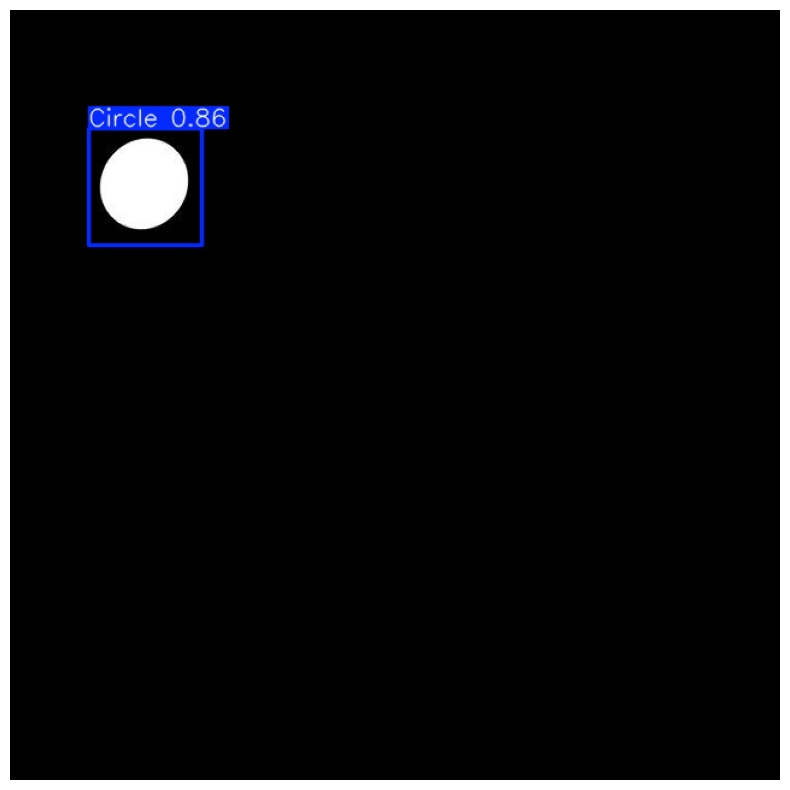

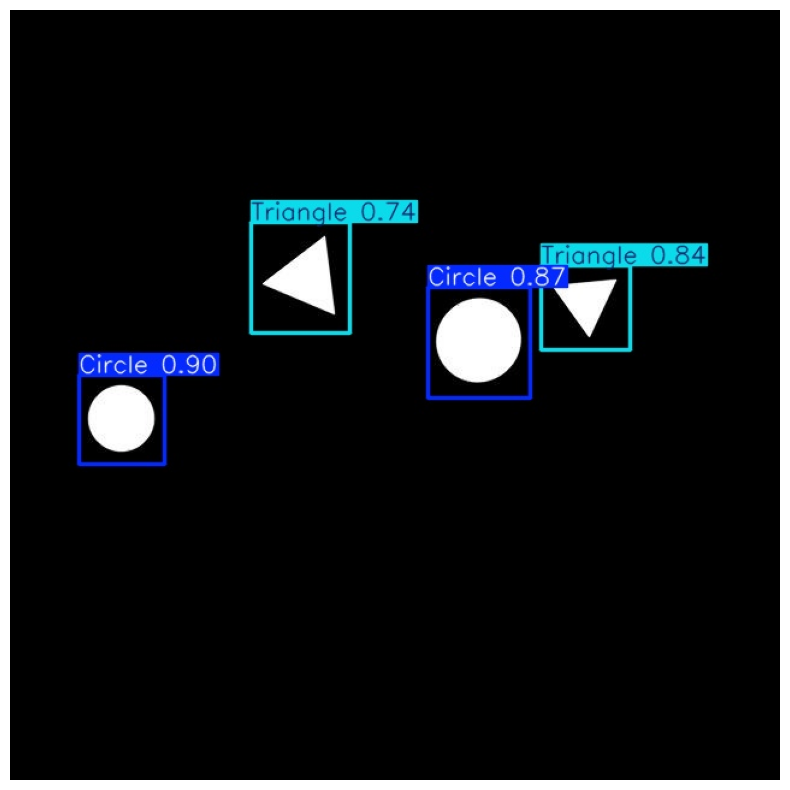

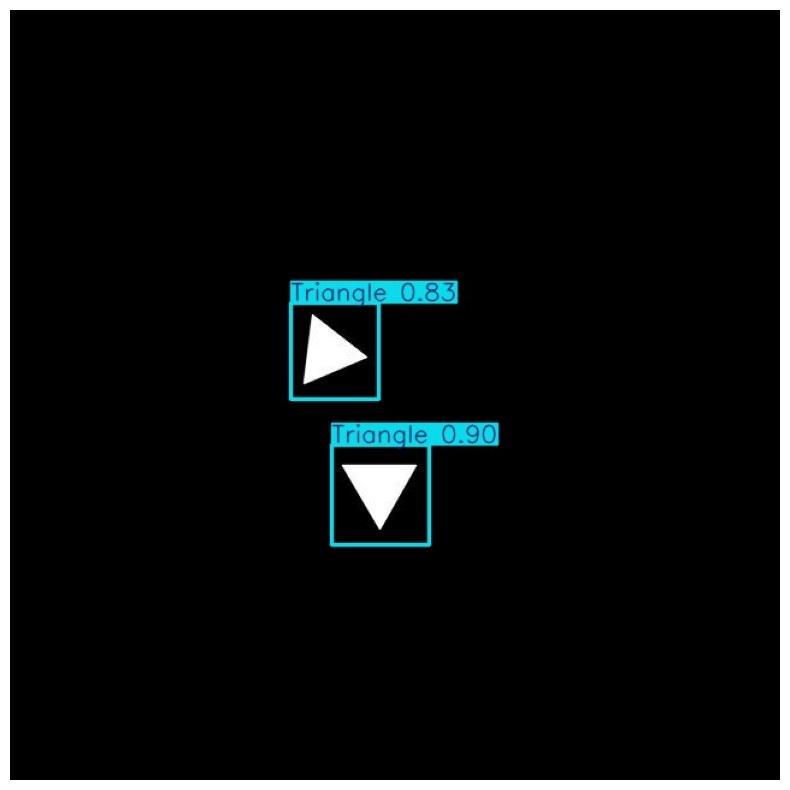

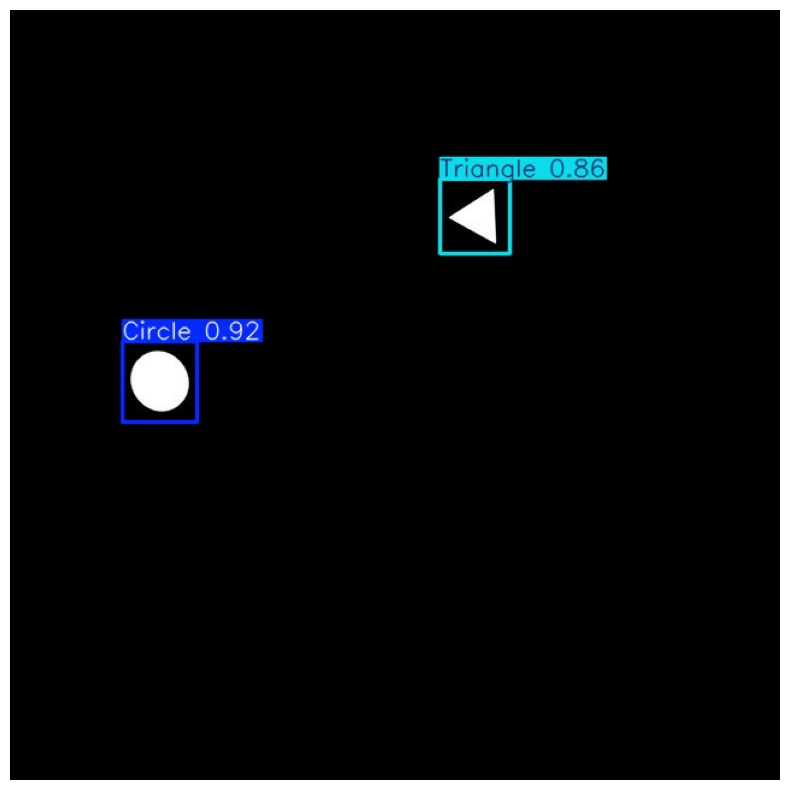

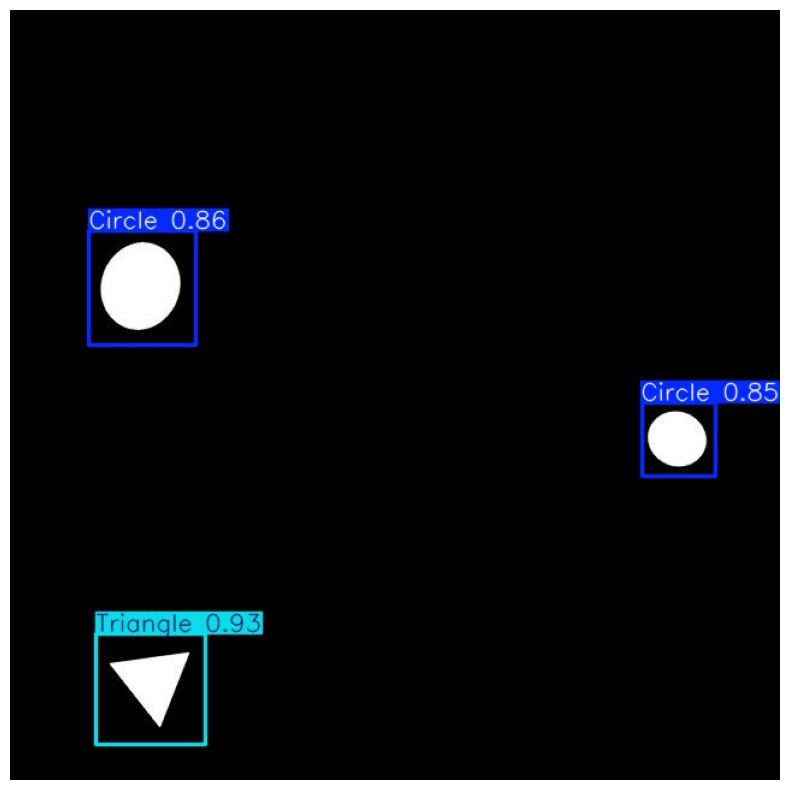

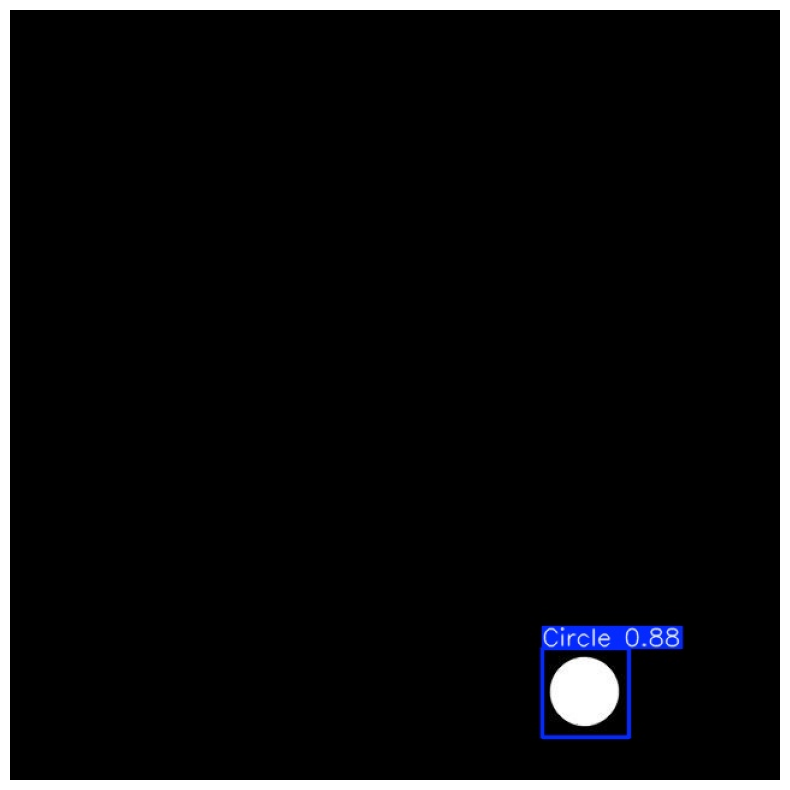

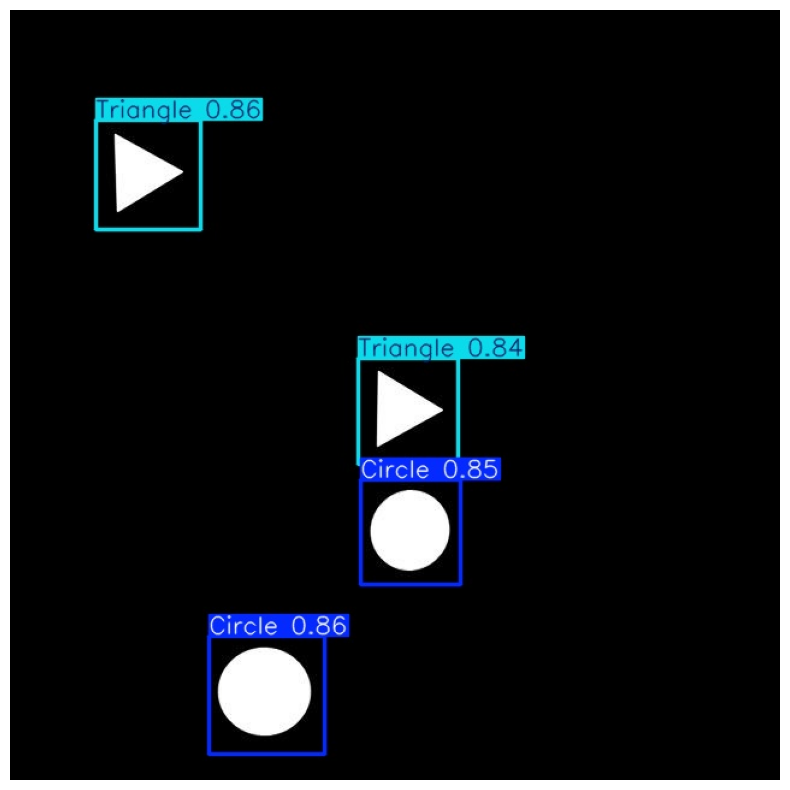

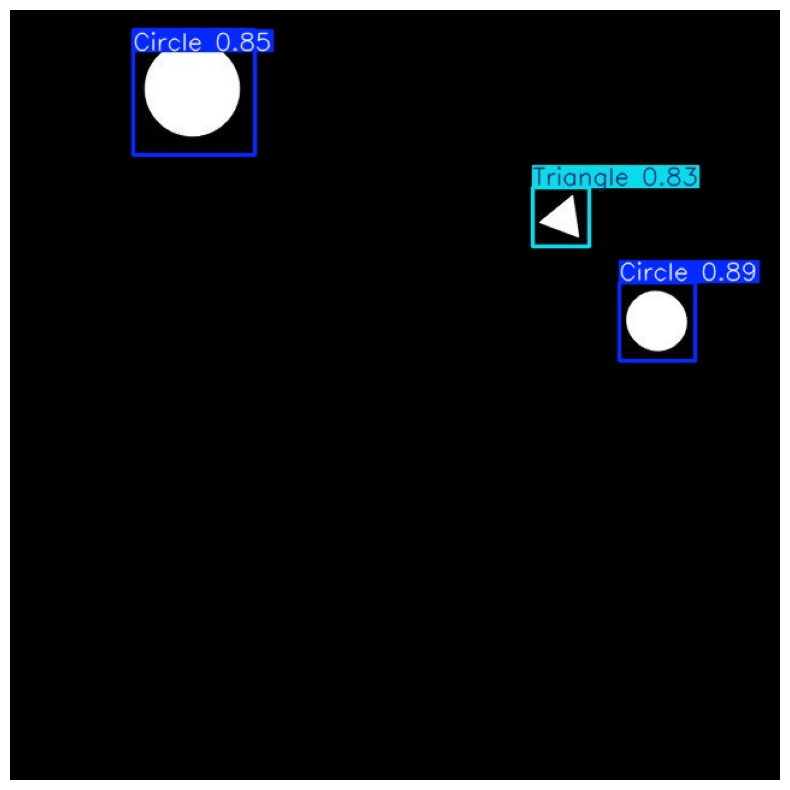

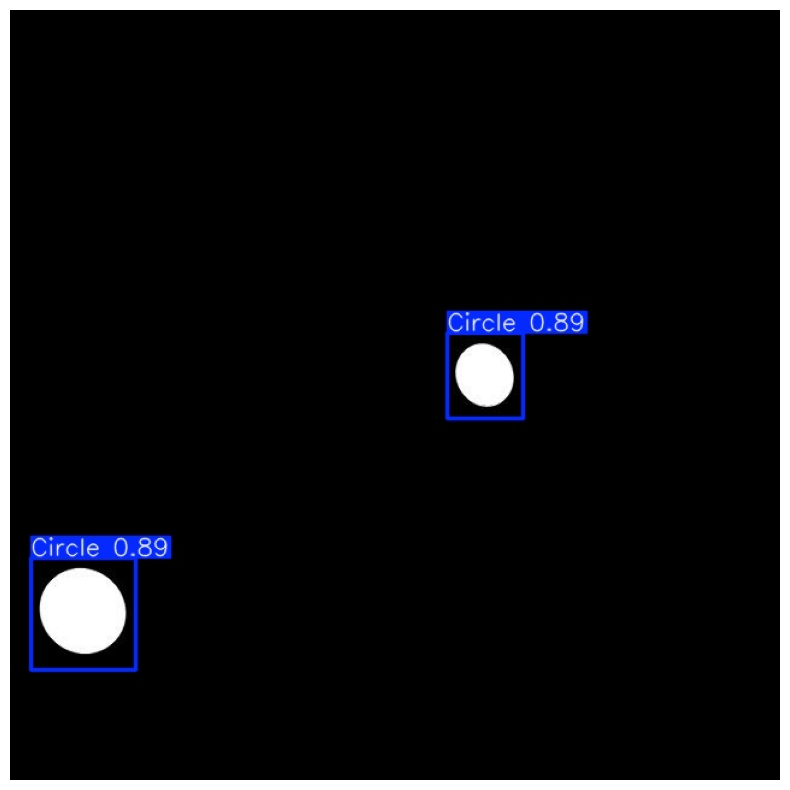

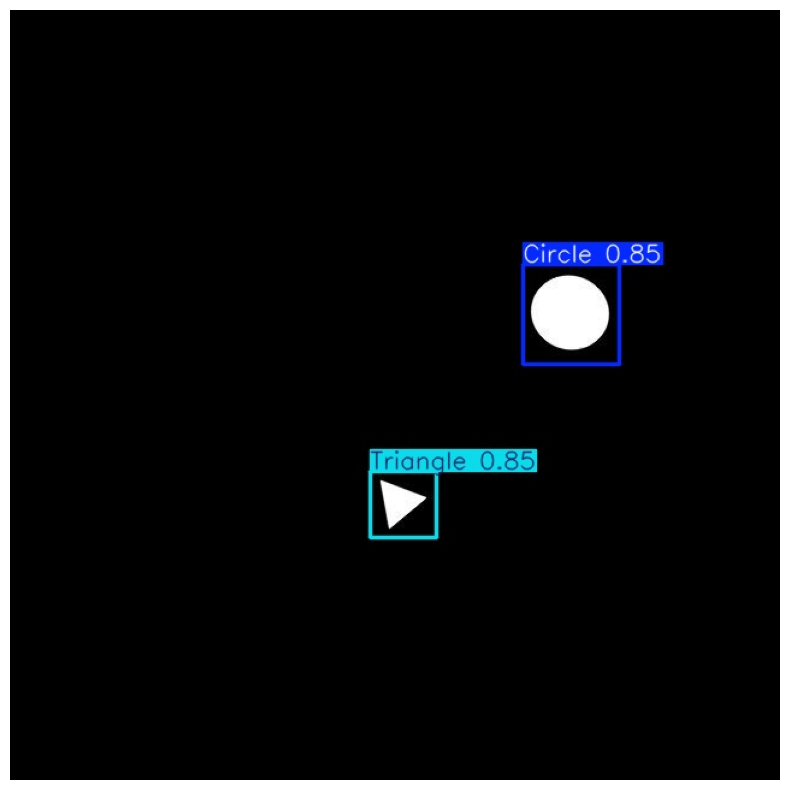

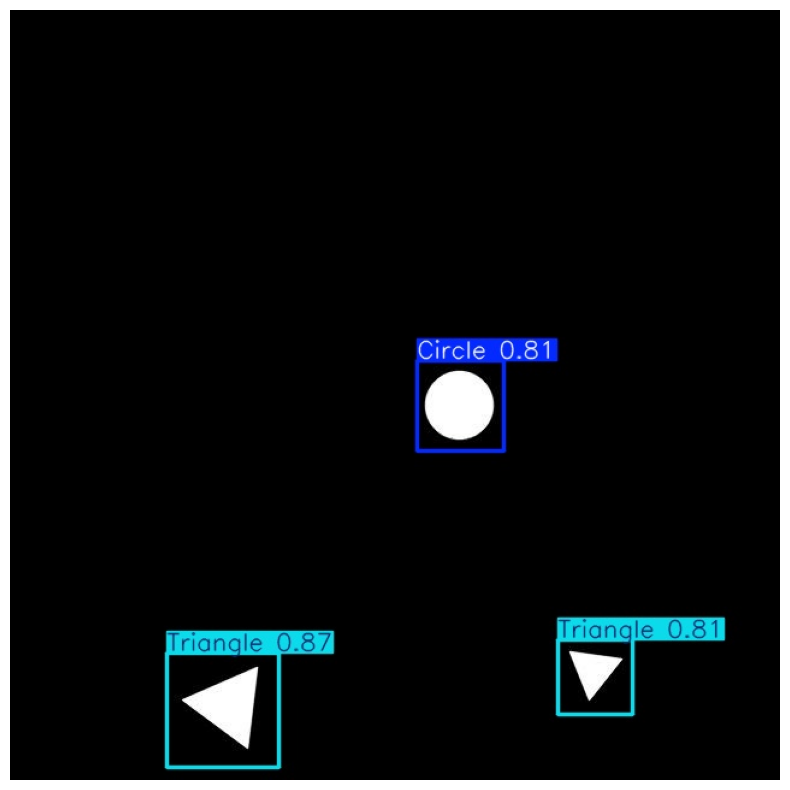

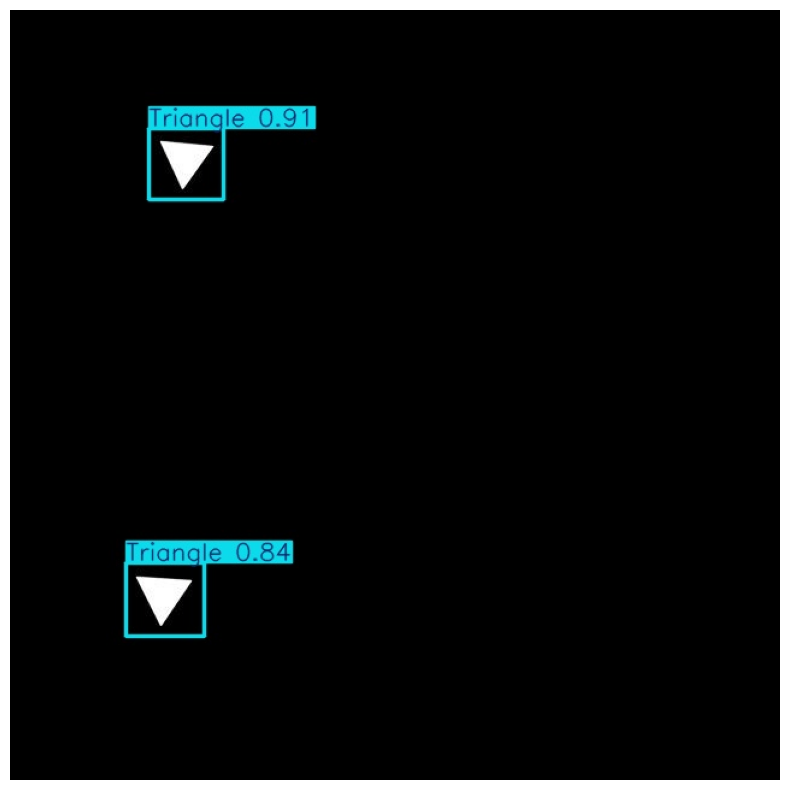

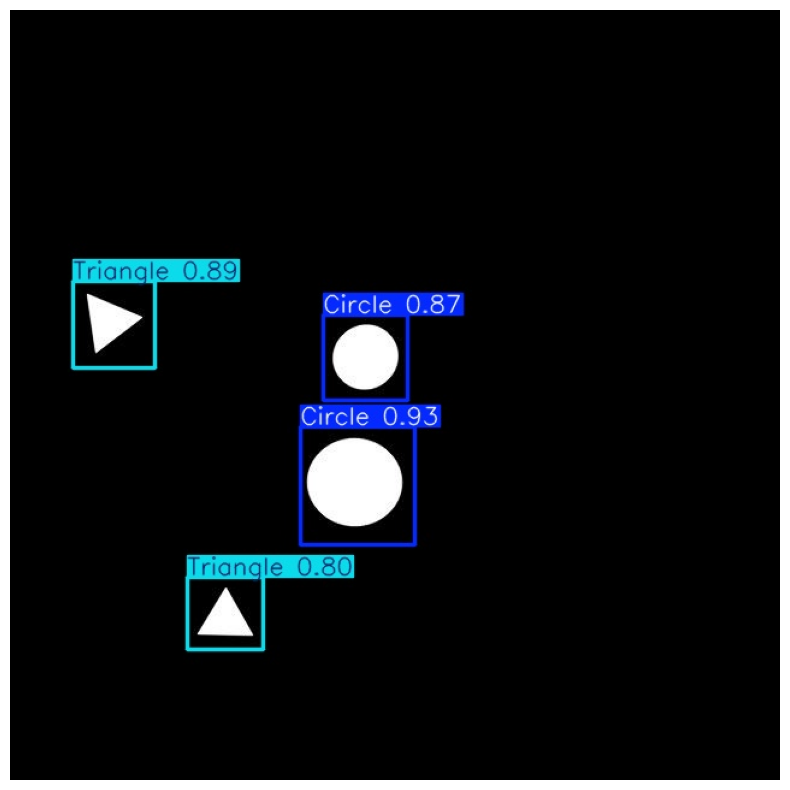

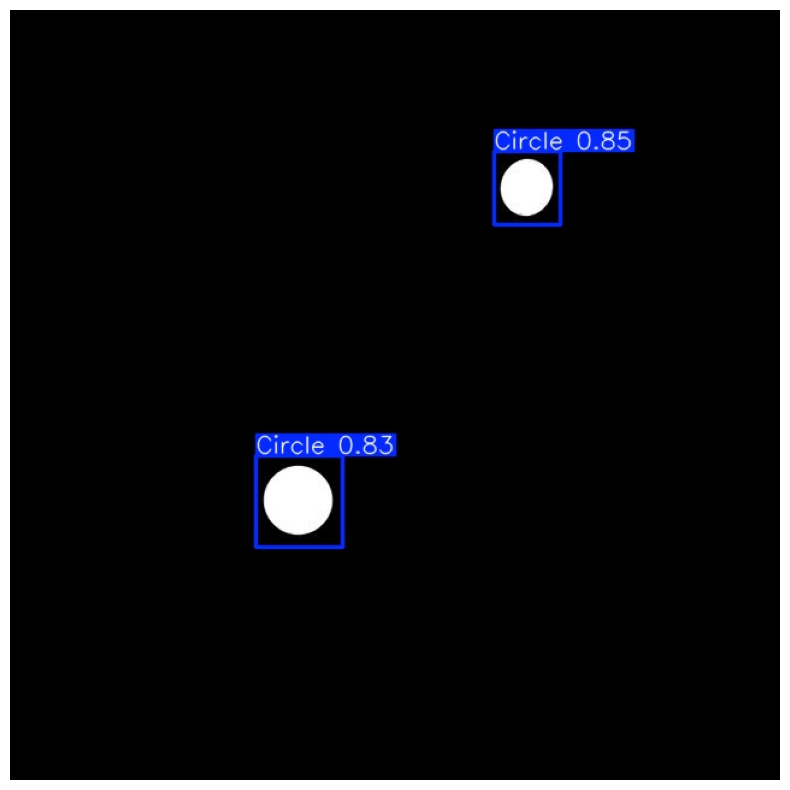

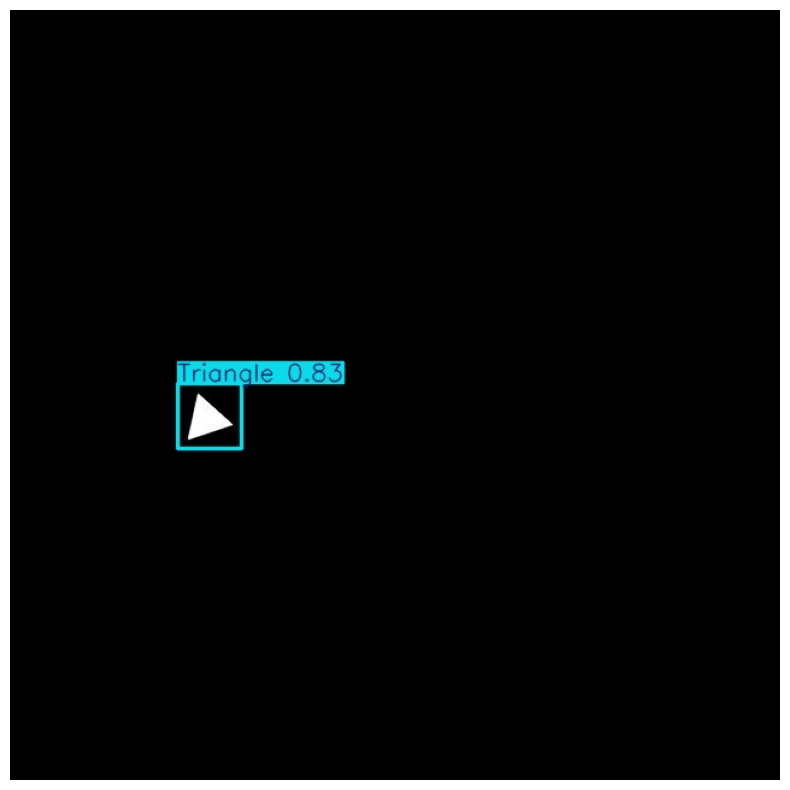

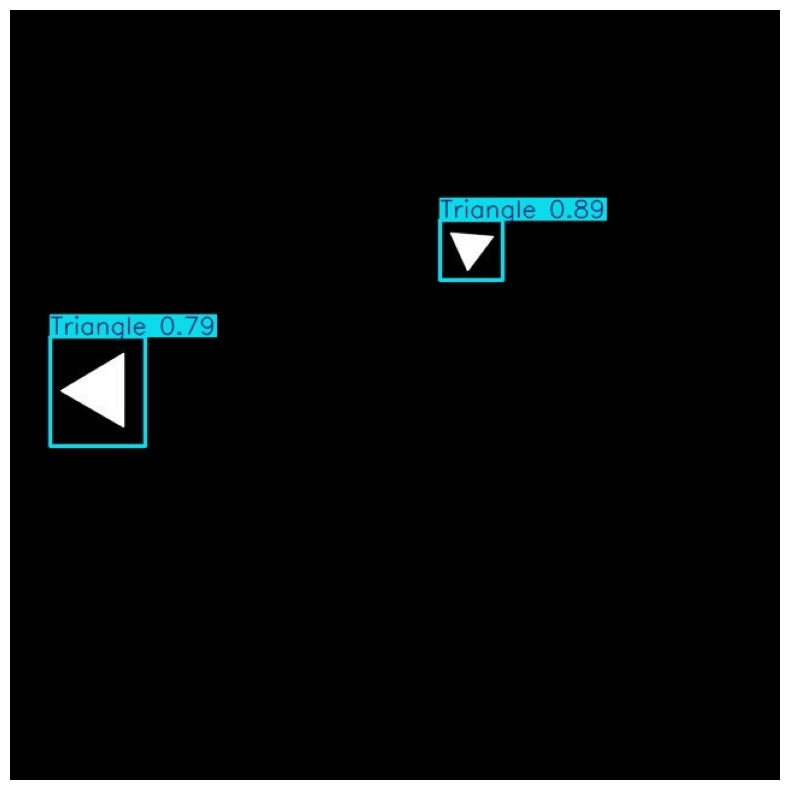

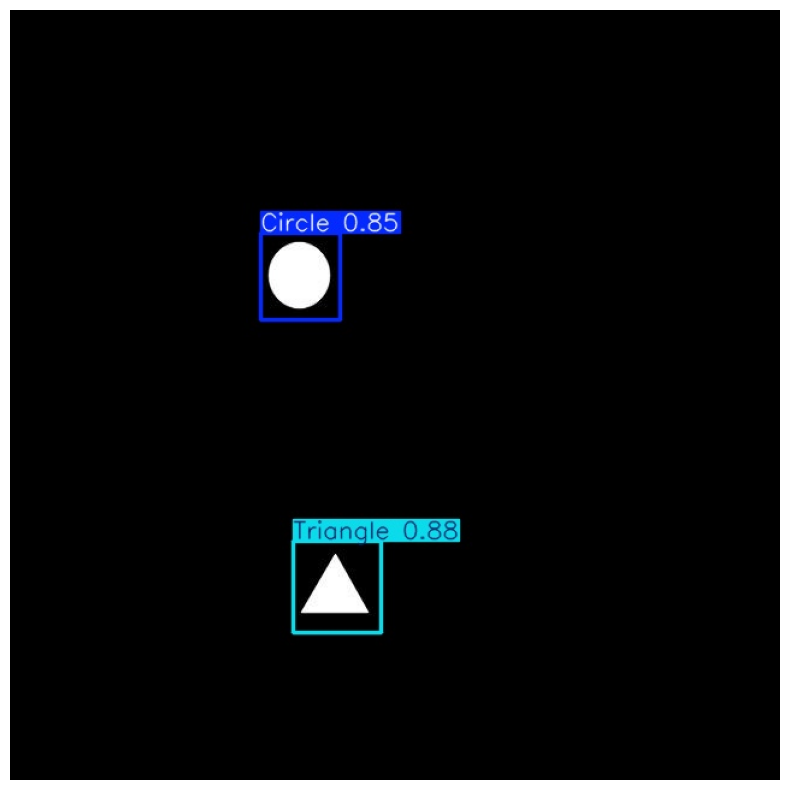

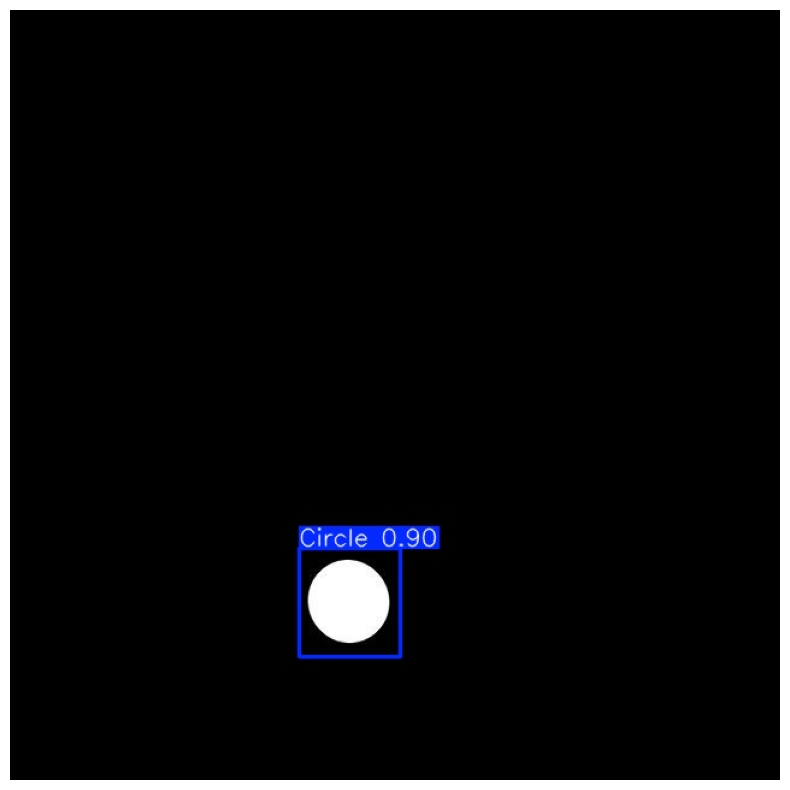

In [ ]:
dir_predicoes = 'runs/detect/predict/'
caminhos = [os.path.join(dir_predicoes, f) for f in os.listdir(dir_predicoes)]

for caminho_imagem in caminhos:
  imagem = cv2.imread(caminho_imagem)

  draw(imagem)